## Installing required Libraries

In [1]:
!pip install seaborn
!pip install tf-keras
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 113.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 137.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 48.9 MB/s eta 0:00:00


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the Dataset from UCI Repository
trainDataset = pd.read_csv("drugsComTrain_raw.tsv", sep = '\t')
testDataset = pd.read_csv("drugsComTest_raw.tsv", sep = '\t')

data = pd.concat([trainDataset, testDataset])
print('Final concatenated Dataset ', data.shape)

Final concatenated Dataset  (215063, 7)


In [5]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [6]:
data.columns = ['Id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
data.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


# Data Pre-processing

In [7]:
# Removing null values from the columns
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
data.shape

(213869, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           213869 non-null  int64  
 1   drugName     213869 non-null  object 
 2   condition    213869 non-null  object 
 3   review       213869 non-null  object 
 4   rating       213869 non-null  float64
 5   date         213869 non-null  object 
 6   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [9]:
data['Id'].nunique()

213869

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,213869.0,116076.924786,67016.705794,0.0,58122.0,115972.0,174018.0,232291.0
rating,213869.0,6.991149,3.275792,1.0,5.0,8.0,10.0,10.0
usefulCount,213869.0,28.094118,36.401377,0.0,6.0,16.0,36.0,1291.0


# EDA 

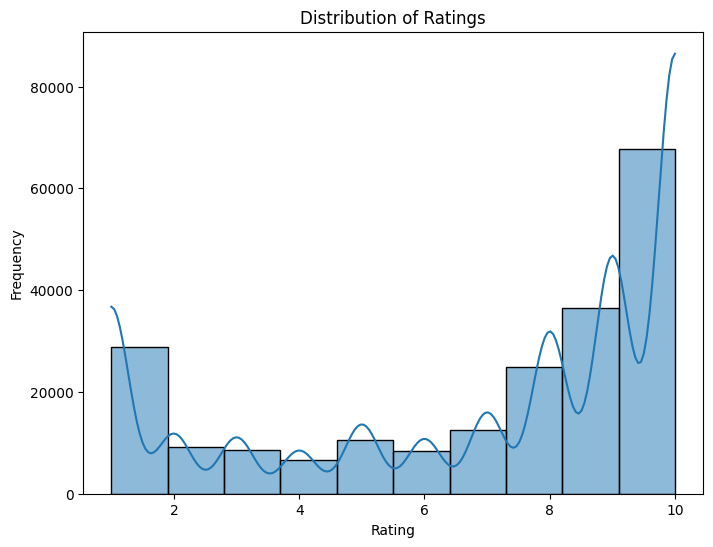

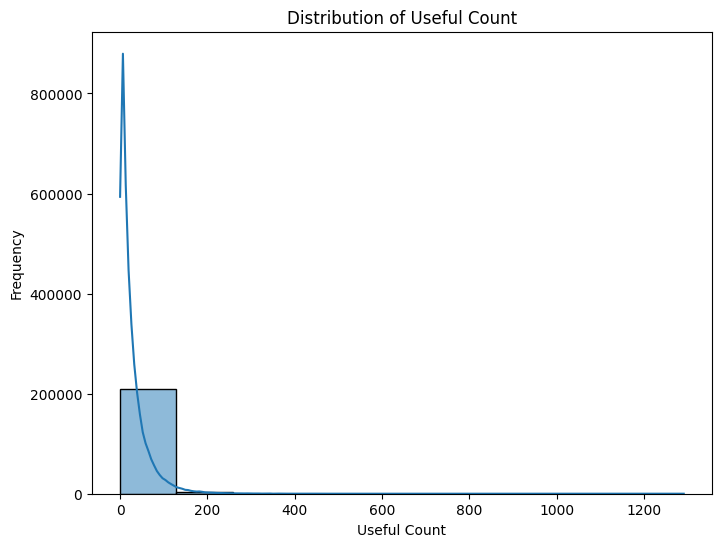

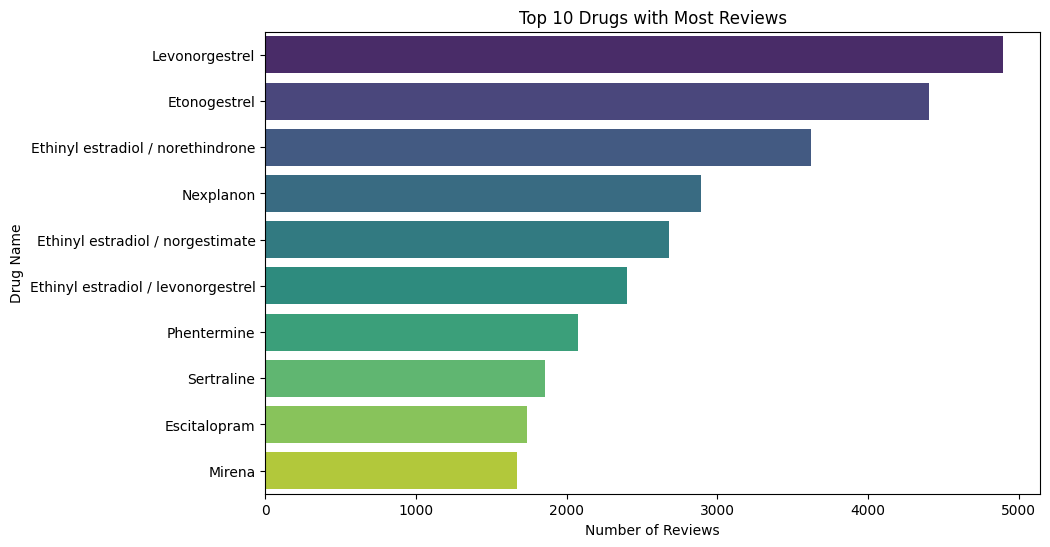

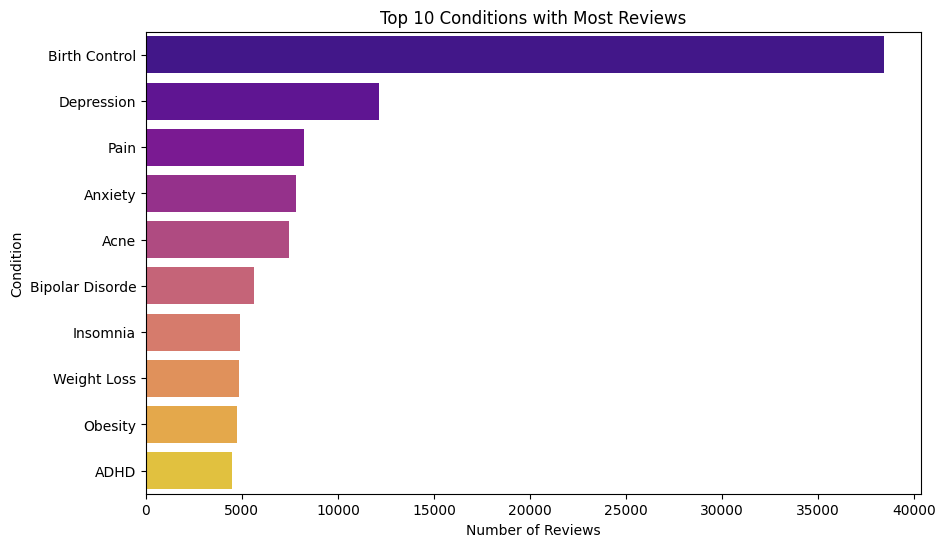

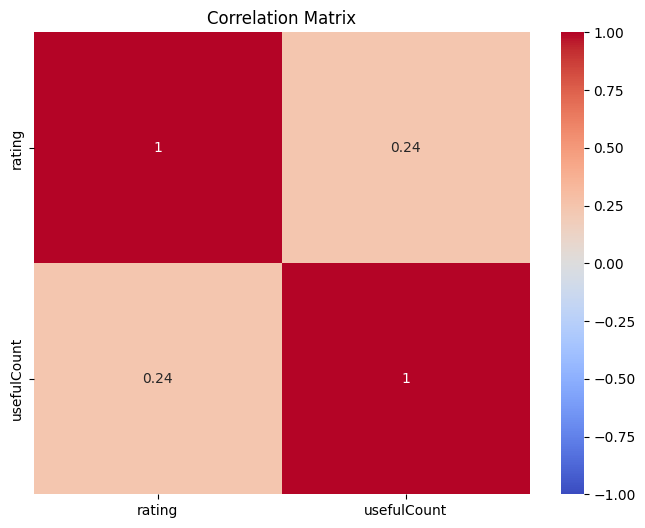

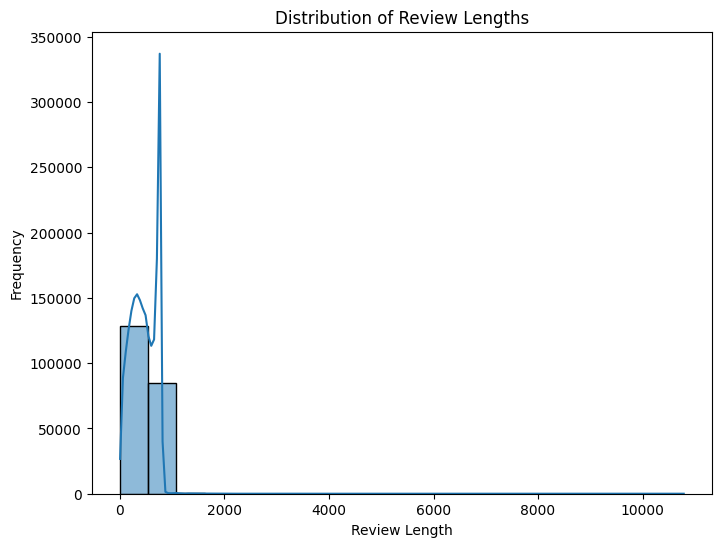

In [11]:
# Distribution of 'rating'
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'usefulCount'
plt.figure(figsize=(8, 6))
sns.histplot(data['usefulCount'], bins=10, kde=True)
plt.title('Distribution of Useful Count')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.show()

# Top 10 drugs with the most reviews
plt.figure(figsize=(10, 6))
top_10_drugs = data['drugName'].value_counts().head(10)
sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index, palette='viridis')
plt.title('Top 10 Drugs with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Name')
plt.show()

# Top 10 conditions with the most reviews
plt.figure(figsize=(10, 6))
top_10_conditions = data['condition'].value_counts().head(10)
sns.barplot(x=top_10_conditions.values, y=top_10_conditions.index, palette='plasma')
plt.title('Top 10 Conditions with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Condition')
plt.show()

# Correlation between numerical columns
plt.figure(figsize=(8, 6))
corr_matrix = data[['rating', 'usefulCount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Checking the length of reviews
data['review_length'] = data['review'].apply(lambda x: len(str(x)))

# Distribution of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(data['review_length'], bins=20, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [57]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm 

tqdm.pandas()
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariarajbhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# Removing Stop words
data['cleanReview'] = data['review'].progress_apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

100%|██████████| 213869/213869 [00:35<00:00, 6083.66it/s]


In [27]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the DF series
data['cleanReview'] = data['cleanReview'].progress_apply(remove_punctuations)

100%|██████████| 213704/213704 [00:02<00:00, 89534.33it/s]


In [59]:
data['cleanReview'][1]

1    "My son halfway fourth week Intuniv. We became...
1    "My son Crohn&#039;s disease done well Asacol....
Name: cleanReview, dtype: object

In [60]:
# Removing long sentences for exception handling
import re

def has_long_sentence(text, max_length=1000):
    # Split text into sentences using regex
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    # Check if any sentence exceeds the minimum length
    return any(len(sentence) > max_length for sentence in sentences)

## Removing long sentences from the dataframe column reviews
data = data[~data['cleanReview'].progress_apply(has_long_sentence)]

100%|██████████| 213869/213869 [00:07<00:00, 29149.60it/s]


In [13]:
# VADER APPROACH
import nltk
nltk.download('vader_lexicon')

# VADER Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return 'positive' if score['compound'] >= 0.05 else 'negative' if score['compound'] <= -0.05 else 'neutral'

data['vader_sentiment'] = data['cleanReview'].progress_apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
  0%|          | 288/213704 [00:00<01:14, 2876.16it/s]100%|██████████| 213704/213704 [01:11<00:00, 2976.39it/s]


In [17]:
# ROBERTA Approach Using a pipeline

from transformers import pipeline

pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment_pipeline = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment')

# Extract sentiments
def get_sentiment_label(sentiment):
    try:
        if sentiment['label'] == 'LABEL_0':
            return 'negative'
        elif sentiment['label'] == 'LABEL_1':
            return 'neutral'
        else:
            return 'positive'
    except:
        return 'error:' + sentiment

2024-09-09 05:58:47.131872: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-09 05:58:47.256839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 05:58:47.304434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 05:58:47.318480: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-09 05:58:47.408581: I tensorflow/core/platform/cpu_feature_guar

In [29]:
data['roberta_sentiment'] = data['cleanReview'].progress_apply(lambda x: get_sentiment_label(sentiment_pipeline(x)[0]))

100%|██████████| 213706/213706 [9:05:12<00:00,  6.53it/s]   


In [13]:
data.head()

,Unnamed: 0,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,roberta_sentiment,vader_sentiment
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,neutral,neutral
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,neutral,positive
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,negative,positive
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,positive,positive
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,positive,positive


In [32]:
data.to_csv('roberta_sentiment_processed.csv', index=False)

# Visualization

In [74]:
data.condition.value_counts()

condition
Birth Control                                   38401
Depression                                      12145
Pain                                             8244
Anxiety                                          7804
Acne                                             7422
                                                ...  
Linear IgA Disease                                  1
ungal Pneumonia                                     1
145</span> users found this comment helpful.        1
Scleroderma                                         1
Tinea Barbae                                        1
Name: count, Length: 915, dtype: int64

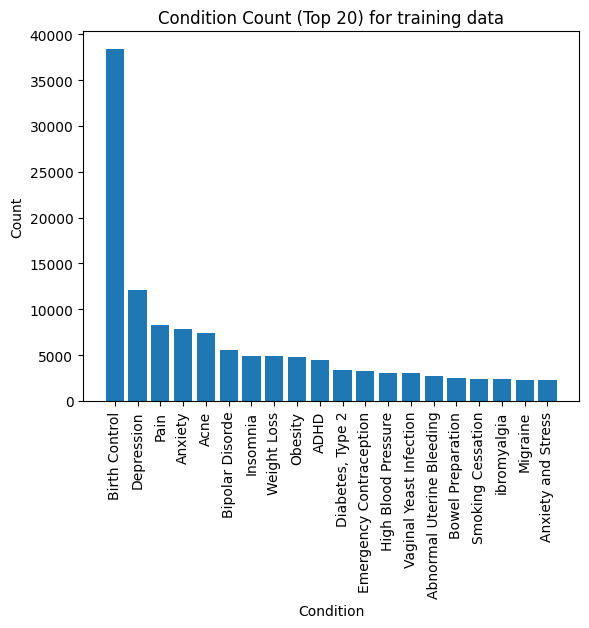

In [75]:
condition = data['condition']

# Counting the occurrence of each condition value
condition_counts = data.condition.value_counts()

# Getting the top 20 conditions with the highest counts
top_20_conditions = condition_counts.head(20)

# Sortting the conditions and their corresponding counts in descending order
sorted_conditions = top_20_conditions.index
sorted_counts = top_20_conditions.values

# Plotting the bar chart with ordered values
plt.bar(range(len(sorted_conditions)), sorted_counts)

# Setting the x-axis tick positions and labels
plt.xticks(range(len(sorted_conditions)), sorted_conditions, rotation=90)

# Addding labels and title
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Condition Count (Top 20) for training data')

plt.show()

In [76]:
!pip install WordCloud

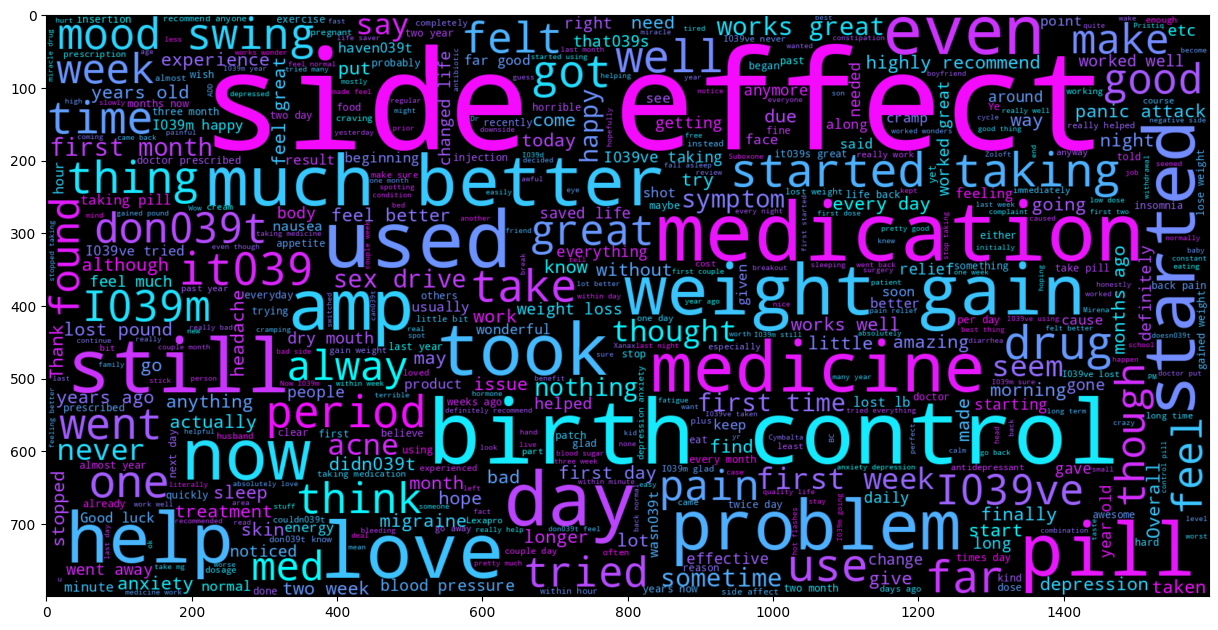

In [80]:
from wordcloud import WordCloud

# Word cloud for Positive sentiment strings
positive_sentiments = data[data.roberta_sentiment == 'positive']
positive_string = []
for s in positive_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')

wordCloud = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap='cool').generate(positive_string)
plt.figure(figsize = (15,15))
plt.imshow(wordCloud,interpolation='bilinear')
plt.show()

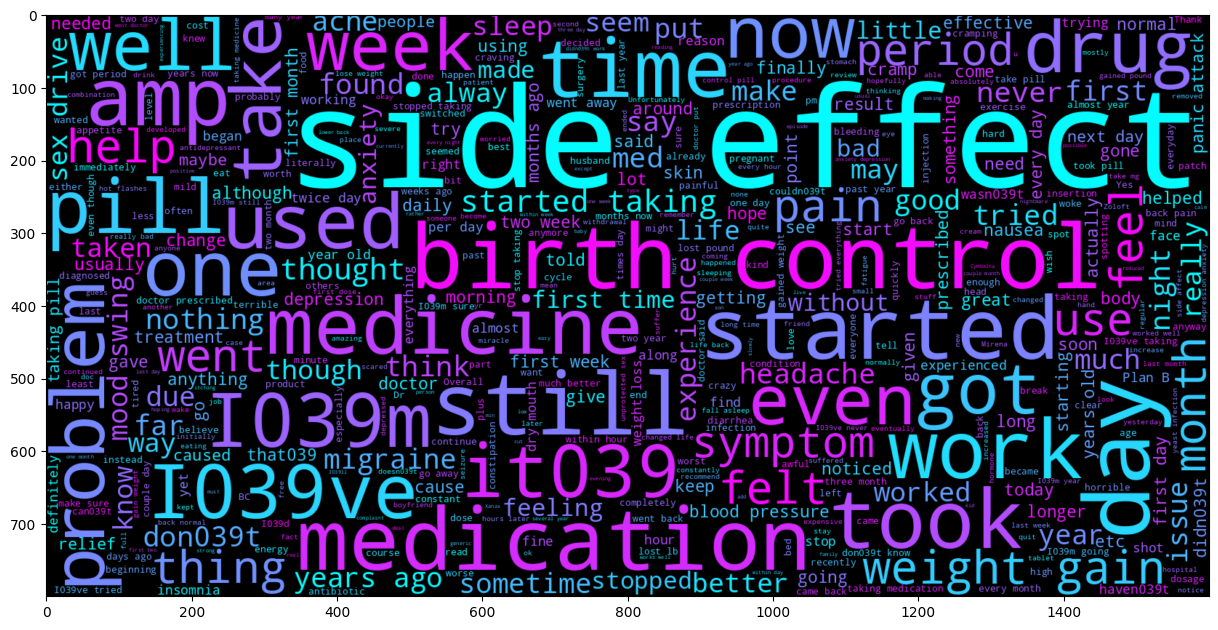

In [78]:
# Word cloud for Neutral sentiment strings

neutral_sentiments = data[data.roberta_sentiment == 'neutral']
neutral_string = []
for s in neutral_sentiments.cleanReview:
  neutral_string.append(s)
neutral_string = pd.Series(neutral_string).str.cat(sep=' ')

wordCloud = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap='cool').generate(neutral_string)
plt.figure(figsize = (15,15))
plt.imshow(wordCloud,interpolation='bilinear')
plt.show()

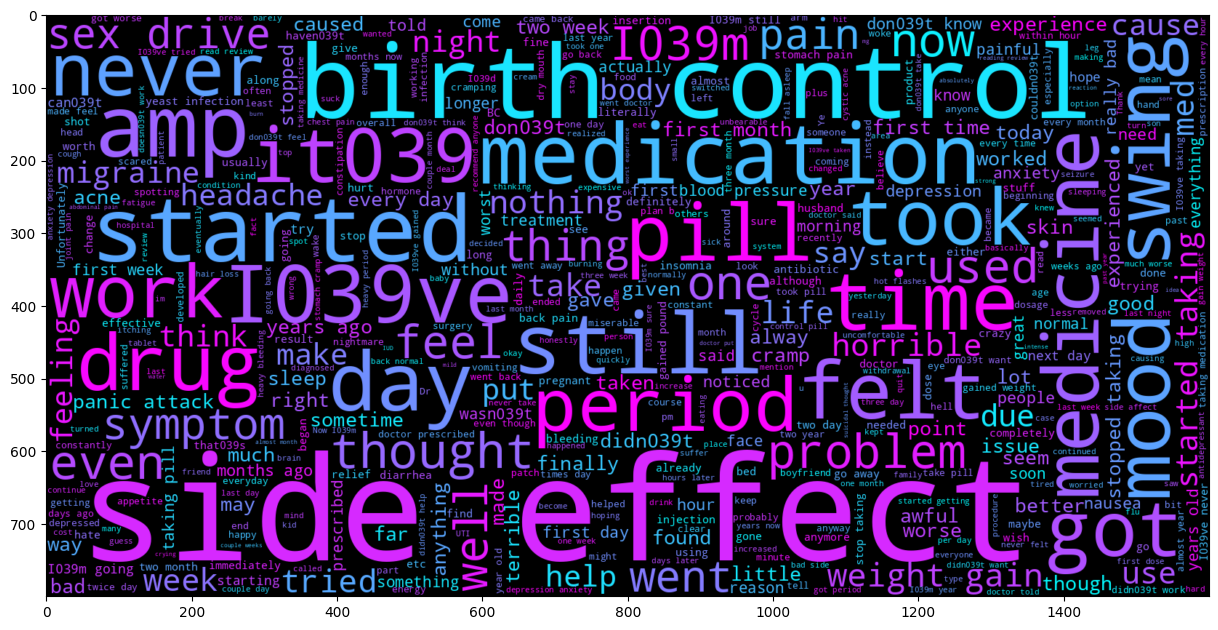

In [81]:
# Word cloud for Negative sentiment strings

negative_sentiments = data[data.roberta_sentiment == 'negative']
negative_string = []
for s in negative_sentiments.cleanReview:
  negative_string.append(s)
negative_string = pd.Series(negative_string).str.cat(sep=' ')

wordCloud = WordCloud(max_words = 500 , width = 1600 , height = 800,colormap='cool').generate(negative_string)
plt.figure(figsize = (15,15))
plt.imshow(wordCloud,interpolation='bilinear')
plt.show()

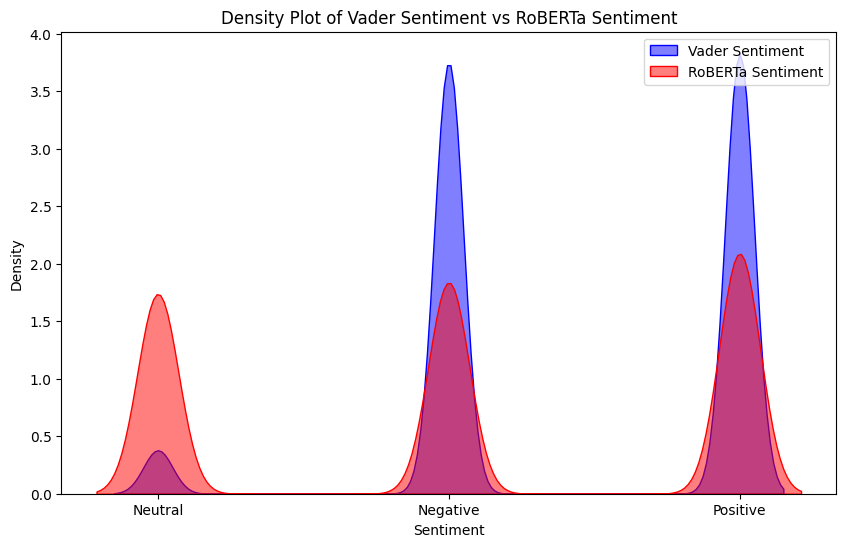

In [82]:
# Mapping sentiments to new numerical values for plotting
sentiment_mapping = {'negative': 1, 'neutral': 0, 'positive': 2}
data['vader_sentiment_num'] = data['vader_sentiment'].map(sentiment_mapping)
data['roberta_sentiment_num'] = data['roberta_sentiment'].map(sentiment_mapping)

# Plotting the density plot
plt.figure(figsize=(10, 6))
plt.xticks([0, 1, 2], ['Neutral', 'Negative', 'Positive'])
sns.kdeplot(data['vader_sentiment_num'], label='Vader Sentiment', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data['roberta_sentiment_num'], label='RoBERTa Sentiment', color='red', fill=True, alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.title('Density Plot of Vader Sentiment vs RoBERTa Sentiment')
plt.legend()

# Display the plot
plt.show()

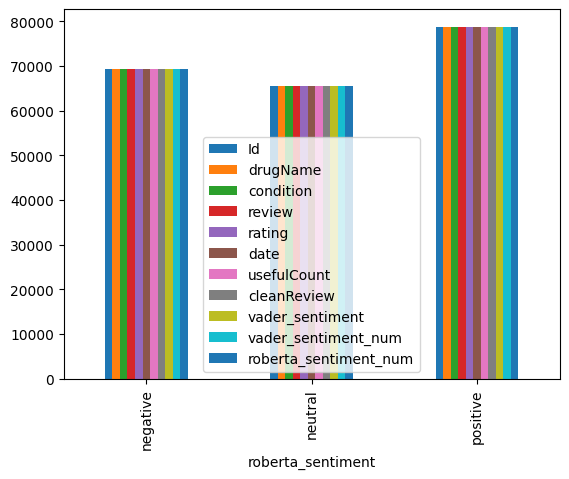

In [83]:
data.groupby('roberta_sentiment').count().plot.bar()
plt.show()

# Exploring and Training Classical Machine Learning Models

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
# Converting sentiment labels to integers
label_encoder = LabelEncoder()
data['roberta_sentiment_label'] = label_encoder.fit_transform(data['roberta_sentiment'])

In [31]:
# TF-IDF for text to numerical representations
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = vectorizer.fit_transform(data.cleanReview)
labels   = data.roberta_sentiment_label

In [32]:
print(features, labels)

  (0, 519148)	0.12929279990816667
  (0, 329043)	0.19411755956333962
  (0, 268274)	0.264633057305201
  (0, 983279)	0.12632203345700585
  (0, 612944)	0.2764227671104792
  (0, 1085664)	0.22952831650754635
  (0, 519519)	0.3821514329565465
  (0, 329163)	0.40581705532647644
  (0, 268345)	0.3867104986225569
  (0, 984102)	0.4156391760537696
  (0, 612983)	0.3122385386682904
  (1, 1407936)	0.0647663844079035
  (1, 696733)	0.09242170172037552
  (1, 633716)	0.07854151287324197
  (1, 1679642)	0.07061720490620388
  (1, 822972)	0.09690030170576264
  (1, 343659)	0.07353135999269285
  (1, 206674)	0.05456809868429347
  (1, 1431065)	0.03046152016961978
  (1, 1506533)	0.028510023333180697
  (1, 736603)	0.0852895943471136
  (1, 481143)	0.042458170179757185
  (1, 408731)	0.0944104921124227
  (1, 706255)	0.06925117194721148
  (1, 203874)	0.05212361680635801
  :	:
  (213702, 829663)	0.09615084827314965
  (213702, 1112196)	0.12298738578442114
  (213702, 546459)	0.11114669485356912
  (213702, 254205)	0.13353838

# Splitting of the dataset for training Classical ML models

In [33]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2, random_state=42)

In [34]:
models = [
  LinearSVC(),
  MultinomialNB(),
  LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000),
  RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in tqdm(models):
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)  
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

100%|██████████| 4/4 [21:36<00:00, 324.09s/it]


In [36]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.887611
LogisticRegression        0.829928
MultinomialNB             0.725733
RandomForestClassifier    0.368767
Name: accuracy, dtype: float64

In [37]:
from sklearn.preprocessing import label_binarize

model_names = ["LinearSVC", "MultinomialNB", "LogisticRegression", "RandomForestClassifier"]

# Initializing dictionaries to store predictions and probabilities
predictions = {}
probabilities = {}
classification_reports = {}

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    predictions[name] = y_pred
    
    # Generating classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)
    else:  # For models that don't have predict_proba (like LinearSVC)
        decision_function = model.decision_function(x_test)
        y_prob = np.exp(decision_function) / np.sum(np.exp(decision_function), axis=1, keepdims=True)
    probabilities[name] = y_prob

In [38]:
# Printing the classification reports
for name, report in classification_reports.items():
    print(f"Classification Report for {name}:")
    print(report)
    print("\n")

Classification Report for LinearSVC:
{'0': {'precision': 0.8988404353702781, 'recall': 0.9107619116269011, 'f1-score': 0.9047619047619048, 'support': 13873.0}, '1': {'precision': 0.8470211915233906, 'recall': 0.8127062073198803, 'f1-score': 0.8295089670295246, 'support': 13033.0}, '2': {'precision': 0.9016008405958341, 'recall': 0.9211872434480581, 'f1-score': 0.9112888111451241, 'support': 15835.0}, 'accuracy': 0.8847242694368405, 'macro avg': {'precision': 0.8824874891631675, 'recall': 0.8815517874649466, 'f1-score': 0.8818532276455177, 'support': 42741.0}, 'weighted avg': {'precision': 0.8840619044910332, 'recall': 0.8847242694368405, 'f1-score': 0.8842331858529453, 'support': 42741.0}}


Classification Report for MultinomialNB:
{'0': {'precision': 0.7990717600856837, 'recall': 0.8066748360123982, 'f1-score': 0.8028552980845111, 'support': 13873.0}, '1': {'precision': 0.9108475224794337, 'recall': 0.36530346044655876, 'f1-score': 0.5214676889375685, 'support': 13033.0}, '2': {'preci

ROC AUC score for class Negative (LinearSVC): 0.98
ROC AUC score for class Neutral (LinearSVC): 0.95
ROC AUC score for class Positive (LinearSVC): 0.98
ROC AUC score for class Negative (MultinomialNB): 0.94
ROC AUC score for class Neutral (MultinomialNB): 0.90
ROC AUC score for class Positive (MultinomialNB): 0.94
ROC AUC score for class Negative (LogisticRegression): 0.96
ROC AUC score for class Neutral (LogisticRegression): 0.91
ROC AUC score for class Positive (LogisticRegression): 0.96
ROC AUC score for class Negative (RandomForestClassifier): 0.76
ROC AUC score for class Neutral (RandomForestClassifier): 0.64
ROC AUC score for class Positive (RandomForestClassifier): 0.76


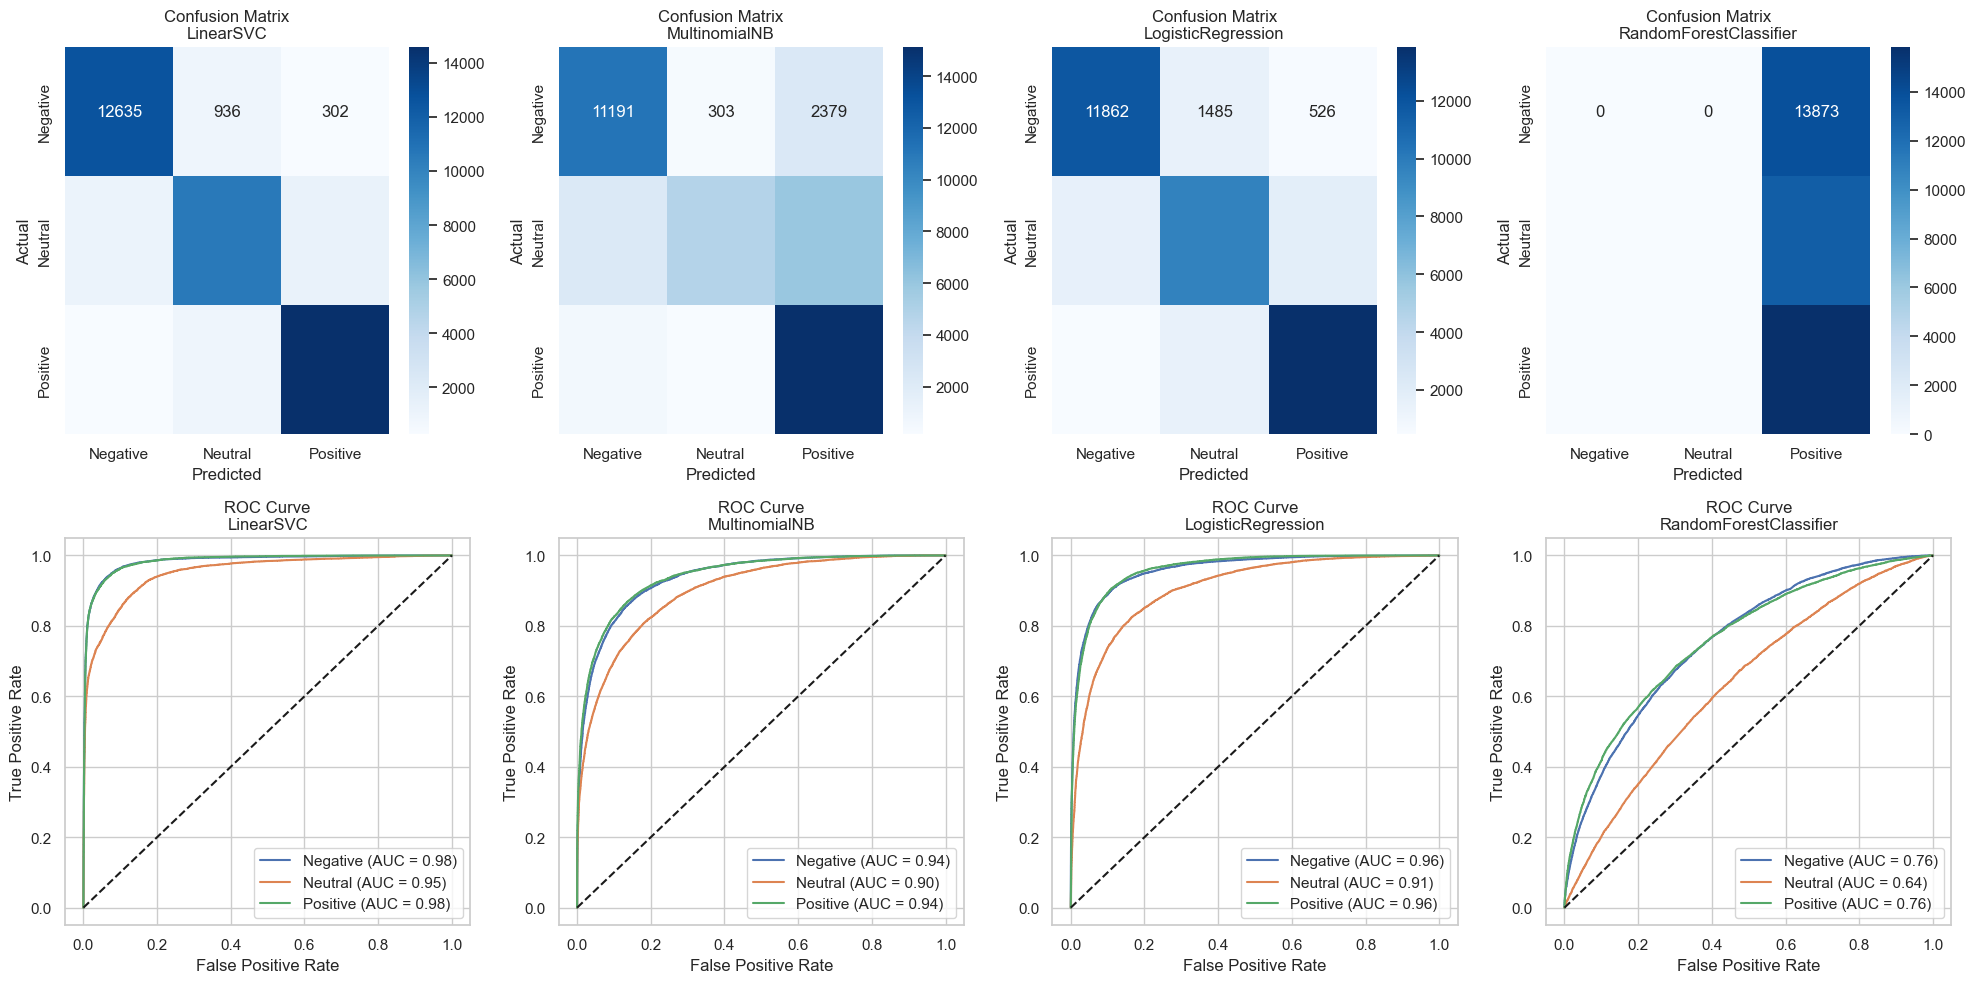

In [42]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Binarize the labels for ROC curve computation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Plotting settings
fig, axes = plt.subplots(2, len(models), figsize=(20, 10))

class_labels = ['Negative', 'Neutral', 'Positive']

for idx, (name, y_pred) in enumerate(predictions.items()):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0, idx], yticklabels=class_labels, xticklabels=class_labels)
    axes[0, idx].set_title(f'Confusion Matrix\n{name}')
    axes[0, idx].set_xlabel('Predicted')
    axes[0, idx].set_ylabel('Actual')
    
    # ROC Curve
    y_prob = probabilities[name]
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
        print(f'ROC AUC score for class {class_labels[i]} ({name}): {roc_auc:.2f}')

        axes[1, idx].plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc_score(y_test_binarized[:, i], y_prob[:, i]):.2f})')
    axes[1, idx].plot([0, 1], [0, 1], 'k--')
    axes[1, idx].set_title(f'ROC Curve\n{name}')
    axes[1, idx].set_xlabel('False Positive Rate')
    axes[1, idx].set_ylabel('True Positive Rate')
    axes[1, idx].legend(loc='best')

plt.tight_layout()
plt.show()

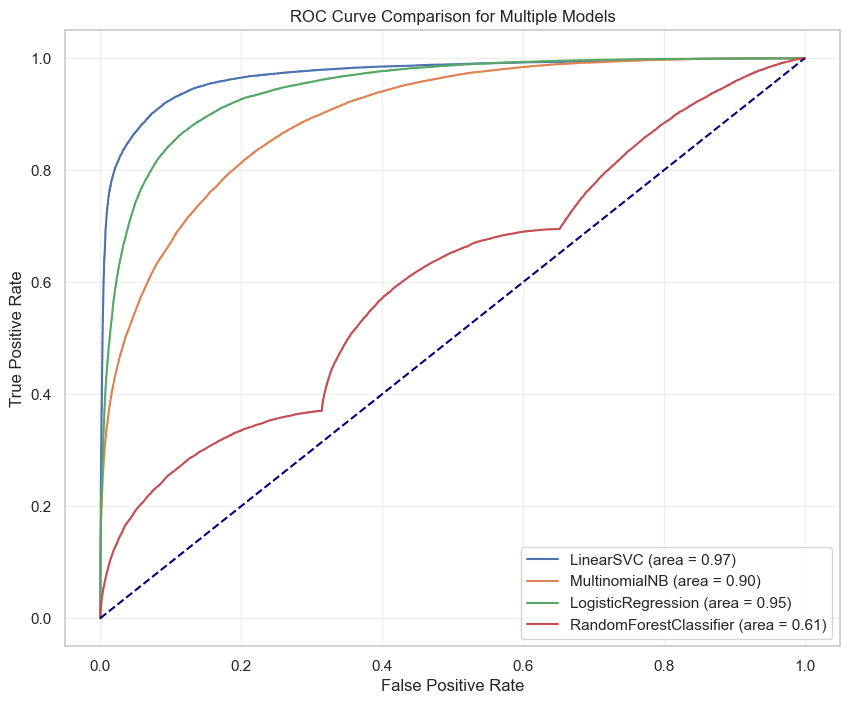

In [43]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

models = [
  LinearSVC(),
  MultinomialNB(),
  LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
  RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
]

# Converting to numeric labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # 3 classes: 0 (Neutral), 1 (Negative), 2 (Positive)
n_classes = y_test_bin.shape[1]

# Initializing plot
plt.figure(figsize=(10, 8))

# Looping through each model and plot its ROC curve
for model in models:
    model_name = model.__class__.__name__

    # Training the model
    if model_name == "LinearSVC":
        model = OneVsRestClassifier(model)
        model.fit(x_train, y_train)
        y_score = model.decision_function(x_test)
    else:
        model.fit(x_train, y_train)
        y_score = model.predict_proba(x_test)
    
    # Computing ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Computing micro-average ROC curve and ROC AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plotting ROC curve for this model
    plt.plot(fpr["micro"], tpr["micro"], label=f'{model_name} (area = {roc_auc["micro"]:.2f})')

# Plotting the diagonal line for a random classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customizing the plot
plt.title('ROC Curve Comparison for Multiple Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Show the plot
plt.show()

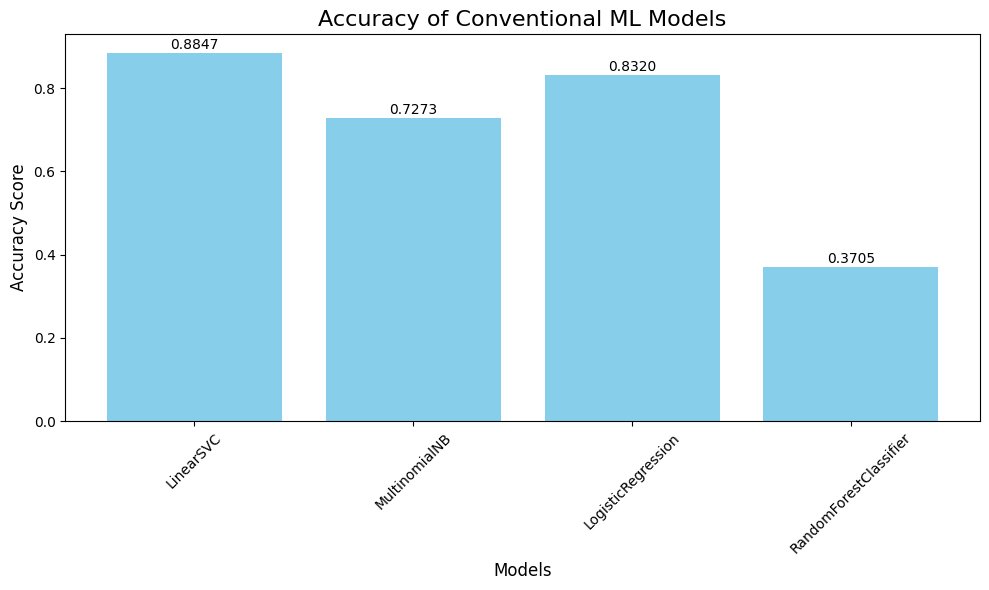

In [25]:
# List to store accuracy scores
model_names = []
accuracy_scores = []

# Looping through each model, train it and calculate the accuracy score
for model in models:
    model_name = model.__class__.__name__
    model.fit(x_train, y_train)
    
    # Predicting on the test set
    y_pred = model.predict(x_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Storing results
    model_names.append(model_name)
    accuracy_scores.append(accuracy)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')

# Adding titles and labels
plt.title('Accuracy of Conventional ML Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

# Accuracy score for all models
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Metrics Bar Graph for 4 traditional ML models

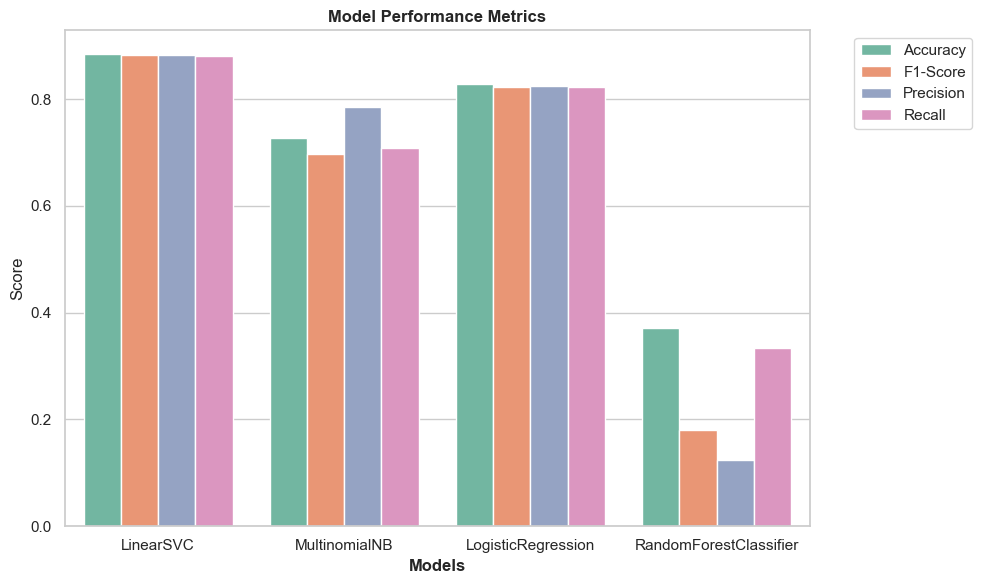

In [41]:
# Initializing dictionaries to store the metrics for each model
metrics = {"Model": [], "Accuracy": [], "F1-Score": [], "Precision": [], "Recall": []}

# Extract the metrics from classification reports
for name, report in classification_reports.items():
    accuracy = report["accuracy"]
    f1_score = report["macro avg"]["f1-score"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]

    # Appending the metrics for the current model
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["F1-Score"].append(f1_score)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)

# Converting the metrics dictionary into a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Setting Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2") 

# Plotting
metrics_long_df = pd.melt(metrics_df, id_vars=["Model"], var_name="Metric", value_name="Score")

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_long_df, palette=palette)

# Labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score')
plt.title('Model Performance Metrics', fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
# Predicting sentiments for new review sentences using all models
example_reviews = [
    "The medicine was great, I feel much better.",  # Positive
    "I don't feel any improvement after using this drug.",  # Negative
    "It was okay, but I still feel a bit sick.",  # Neutral
]

# Transforming the example reviews to the same feature space as the training data
example_vectors = vectorizer.transform(example_reviews)

# Predict sentiment using each model
sentiment_map = {0: "Neutral", 1: "Negative", 2: "Positive"}
for model in models:
    model_name = model.__class__.__name__
    print(f"\nPredictions using {model_name}:")
    
    predictions = model.predict(example_vectors)
    predicted_sentiments = [sentiment_map[pred] for pred in predictions]
    
    for review, sentiment in zip(example_reviews, predicted_sentiments):
        print(f"Review: '{review}' => Predicted Sentiment: {sentiment}")


Predictions using LinearSVC:
Review: 'The medicine was great, I feel much better.' => Predicted Sentiment: Positive
Review: 'I don't feel any improvement after using this drug.' => Predicted Sentiment: Positive
Review: 'It was okay, but I still feel a bit sick.' => Predicted Sentiment: Negative

Predictions using MultinomialNB:
Review: 'The medicine was great, I feel much better.' => Predicted Sentiment: Positive
Review: 'I don't feel any improvement after using this drug.' => Predicted Sentiment: Positive
Review: 'It was okay, but I still feel a bit sick.' => Predicted Sentiment: Positive

Predictions using LogisticRegression:
Review: 'The medicine was great, I feel much better.' => Predicted Sentiment: Positive
Review: 'I don't feel any improvement after using this drug.' => Predicted Sentiment: Positive
Review: 'It was okay, but I still feel a bit sick.' => Predicted Sentiment: Negative

Predictions using RandomForestClassifier:
Review: 'The medicine was great, I feel much better.'

# Final Metrics Bar Graph including all the models used in the study from next file as well

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

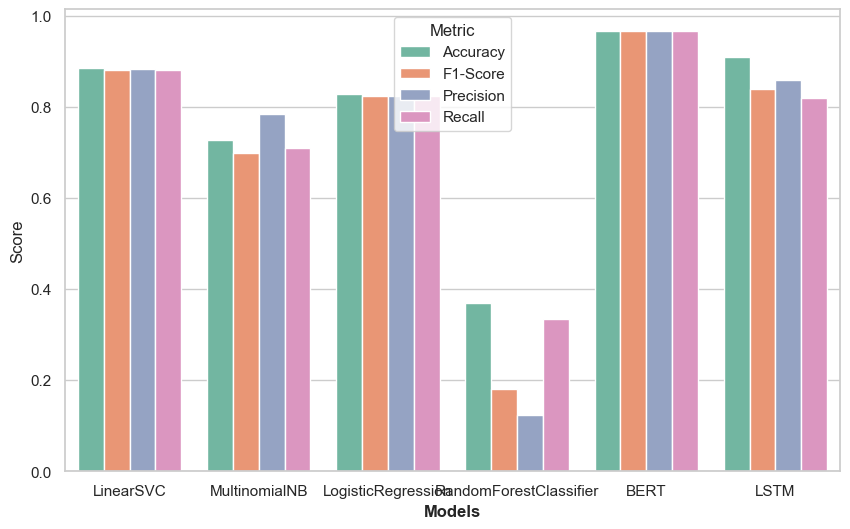

In [44]:
# Initializing dictionaries to store the metrics for each model
metrics = {"Model": [], "Accuracy": [], "F1-Score": [], "Precision": [], "Recall": []}

# Extracting the metrics from classification reports
for name, report in classification_reports.items():
    accuracy = report["accuracy"]
    f1_score = report["macro avg"]["f1-score"]
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]

    # Append the metrics for the current model
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["F1-Score"].append(f1_score)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)

# Adding static entries for BERT and LSTM Obtained from another Notebook : Please check LSTM and BERT file for its metrics obtained
metrics["Model"].append("BERT")
metrics["Accuracy"].append(0.9660)
metrics["F1-Score"].append(0.9658)
metrics["Precision"].append(0.9661)
metrics["Recall"].append(0.9660)

metrics["Model"].append("LSTM")
metrics["Accuracy"].append(0.91)
metrics["F1-Score"].append(0.84)
metrics["Precision"].append(0.86)
metrics["Recall"].append(0.82)

# Converting the metrics dictionary into a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Converting the dataframe to long format for seaborn plotting
metrics_long_df = pd.melt(metrics_df, id_vars=["Model"], var_name="Metric", value_name="Score")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_long_df, palette=palette)

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score')
plt.title